In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
df =pd.read_csv('/content/traffic.csv')

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [4]:
df.shape

(226278, 9)

In [5]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [6]:
df.isna().sum()

,0
event,0
date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


In [7]:
event = df['event'].drop_duplicates()
event

,event
0,click
53605,preview
84043,pageview


# **Question 1**
**Total and Daily pageview events**

In [8]:
df['event'].value_counts()


,count
event,
pageview,142015
click,55732
preview,28531


In [9]:
df[df['event']=='pageview'].shape[0]

142015

In [10]:
df[df['event']=='pageview'].groupby('date',as_index=False)['event'].count()

,date,event
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


In [11]:
df1 = df.drop_duplicates()

In [12]:
df1[df1['event']=='pageview'].groupby('date')['event'].count()

,event
date,
2021-08-19,13006
2021-08-20,11088
2021-08-21,9939
2021-08-22,9982
2021-08-23,9722
2021-08-24,9705
2021-08-25,9918


**Avergae number of pageview**

In [13]:
pageview_counts_per_day = df1[df1['event']=='pageview'].groupby('date')['event'].count()

# Calculate the average number of pageviews per day
average_pageviews = pageview_counts_per_day.mean()

print("Average pageviews per day:", average_pageviews)

Average pageviews per day: 10480.0


# **Question 2**
**Analysis of other Events**

In [14]:
df[df['event']=='click'].groupby('date')['event'].count()

,event
date,
2021-08-19,9207
2021-08-20,8508
2021-08-21,8071
2021-08-22,7854
2021-08-23,7315
2021-08-24,7301
2021-08-25,7476


In [15]:
df1[df1['event']=='click'].groupby('date')['event'].count()


,event
date,
2021-08-19,5860
2021-08-20,4999
2021-08-21,4279
2021-08-22,4421
2021-08-23,4314
2021-08-24,4231
2021-08-25,4395


In [16]:
df[df['event']=='preview'].groupby('date')['event'].count()

,event
date,
2021-08-19,3788
2021-08-20,4222
2021-08-21,4663
2021-08-22,4349
2021-08-23,3847
2021-08-24,3840
2021-08-25,3822


In [18]:
df1[df1['event']=='preview'].groupby('date')['event'].count()

,event
date,
2021-08-19,2290
2021-08-20,2449
2021-08-21,2483
2021-08-22,2524
2021-08-23,2379
2021-08-24,2355
2021-08-25,2228


In [19]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

In [20]:
for event in recorded_events:
    total_events = df[df['event']==event].shape[0]
    print('The total number of',event,'events is',total_events,'\n')
    print(event,'event distribution per day\n')
    print(df[df['event']==event].groupby('date')['event'].count(),'\n')

The total number of click events is 55732 

click event distribution per day

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

The total number of preview events is 28531 

preview event distribution per day

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



# **Question 3**
**Geographical Disribution**

In [21]:
df[df['event']=='click'].groupby('country',as_index=False)['event'].count()

,country,event
0,Albania,76
1,Algeria,129
2,American Samoa,1
3,Angola,36
4,Anguilla,2
...,...,...
197,Wallis and Futuna,1
198,Yemen,16
199,Zambia,38
200,Zimbabwe,5


In [22]:
df3 = df[df['event']=='click']
pd.DataFrame(data=df3['country'].dropna().unique(),columns=['country'])

,country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


In [23]:
set(df['country'].unique()).difference(set(df3['country'].unique()))

{'Afghanistan',
 'Andorra',
 'Faroe Islands',
 'Guinea-Bissau',
 'Jersey',
 'Lesotho',
 'Macao',
 'Samoa',
 'Sint Maarten'}

# **Question 4**
**Click-through rate Analysis**

In [24]:
df[df['event']=='click'].shape[0] / df[df['event']=='pageview'].shape[0]

0.3924374185825441

In [25]:
df1[df1['event']=='click'].shape[0] / df1[df1['event']=='pageview'].shape[0]

0.4430070883315158

In [26]:
click = df[df['event']=='click'].groupby('linkid',as_index=False)['event'].count()
pageview = df[df['event']=='pageview'].groupby('linkid',as_index=False)['event'].count()
dfctr = pd.merge(left = click, right=pageview, on='linkid',how='inner',suffixes=('_click', '_pageview'))
dfctr['ctr']=dfctr['event_click']/dfctr['event_pageview']
dfctr

,linkid,event_click,event_pageview,ctr
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


**CTR varry across different links**

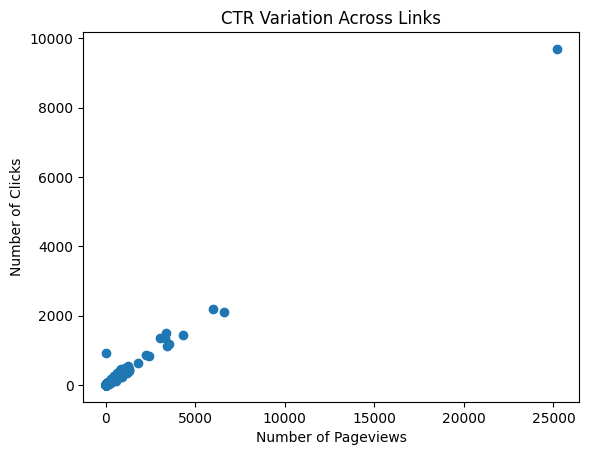

In [27]:
import matplotlib.pyplot as plt

# Assuming you have the 'dfctr' DataFrame defined as in your previous code

# Create a scatter plot
plt.scatter(dfctr['event_pageview'], dfctr['event_click'])

# Add labels and title
plt.xlabel('Number of Pageviews')
plt.ylabel('Number of Clicks')
plt.title('CTR Variation Across Links')

# Show the plot
plt.show()

# **Question 5**
**Correlation Analysis**

In [32]:
# filter only events that are relevant to the question
df6 = df[df['event'].isin(['click','preview'])]
click = df[df['event']=='click'].groupby('linkid',as_index=False)['event'].count().rename(columns={'event':'click'})
preview = df[df['event']=='preview'].groupby('linkid',as_index=False)['event'].count().rename(columns={'event':'preview'})

In [33]:
# join dataframes together to append the number of clicks and preciews to each row
df6 = pd.merge(left=df6,right = click, on='linkid',how='left')
df6 = pd.merge(left=df6,right = preview, on='linkid',how='left')

In [34]:
# drip rows with na in click and preciew columns
df6.dropna( subset = ['click','preview'],inplace=True)
df6


,event,date,country,city,artist,album,track,isrc,linkid,click,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


In [39]:
from scipy import stats
stats.pearsonr(x=df6['click'],y=df6['preview'])

PearsonRResult(statistic=0.9987125072008585, pvalue=0.0)

In [40]:
categorical_cols = ['country', 'city', 'artist', 'album', 'track']
df_cat = df[categorical_cols]\
            .apply(lambda x:pd.factorize(x)[0])
df_cat

,country,city,artist,album,track
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,1,1,1
3,2,2,2,2,2
4,3,3,0,0,0
...,...,...,...,...,...
226273,15,20,68,69,69
226274,1,279,62,63,63
226275,1,37,5,5,5
226276,2,2,356,375,381


In [41]:
df_cat.corr()

,country,city,artist,album,track
country,1.000000,0.188101,0.010852,0.006472,0.005394
city,0.188101,1.000000,0.088732,0.095431,0.097308
artist,0.010852,0.088732,1.000000,0.901881,0.875746
album,0.006472,0.095431,0.901881,1.000000,0.963166
track,0.005394,0.097308,0.875746,0.963166,1.000000


**We observe a high positive correlation between album, artist, and track and almost no correlation between other variables**